First data analysis:
===================

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
df_ti = pd.read_csv(r"path\TI_df.csv")
print(df_ti.head())

                 Name Primary_attribute  Stat_plus  Stat_minus  \
0             Abaddon          Strength          0           2   
1           Alchemist          Strength          2           1   
2  Ancient Apparition      Intelligence          1           0   
3           Anti-Mage           Agility          1           4   
4          Arc Warden           Agility          3           1   

   Abbility_changed  Abbility_rework  Buffed  Nerfed  Reworked  Other_change  \
0                21                0      23      16         0             1   
1                44                0      44      27         0             0   
2                26                0      25       9         0             0   
3                15                0       7      24         0             1   
4                37                0      33      27         3             1   

   In_TI  
0      1  
1      0  
2      1  
3      1  
4      0  


In [67]:
df_ti.describe()

,Stat_plus,Stat_minus,Abbility_changed,Abbility_rework,Buffed,Nerfed,Reworked,Other_change,In_TI
count,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.933333,1.608333,21.125000,0.0,24.350000,16.408333,0.191667,0.491667,0.258333
std,1.926085,1.615554,10.894114,0.0,12.284205,10.006297,0.701689,0.898138,0.439554
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,0.0,16.000000,9.000000,0.000000,0.000000,0.000000
50%,1.500000,1.000000,21.500000,0.0,22.000000,15.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,26.250000,0.0,32.000000,23.000000,0.000000,1.000000,1.000000
max,8.000000,8.000000,53.000000,0.0,59.000000,47.000000,4.000000,5.000000,1.000000


In [68]:
df_ti[df_ti == 0].count()

Name                   0
Primary_attribute      0
Stat_plus             35
Stat_minus            34
Abbility_changed       1
Abbility_rework      120
Buffed                 1
Nerfed                 2
Reworked             110
Other_change          82
In_TI                 89
dtype: int64

From the code above we can see that there are some empty, containning zeroes, columns that might need to be removed.
The column "Abbility_rework" is all zeroes, thus it can be removed as gives no unique information, or even no information at all. the column "Reworked" is mostly zeroes, thus empty. But it might show some correlation to picked heroes or otherwise horoes that was not picked, so for now it won't be removed.   

In [69]:
df_ti.drop("Abbility_rework", 1, inplace=True)
print(df_ti)

                   Name Primary_attribute  Stat_plus  Stat_minus  \
0               Abaddon          Strength          0           2   
1             Alchemist          Strength          2           1   
2    Ancient Apparition      Intelligence          1           0   
3             Anti-Mage           Agility          1           4   
4            Arc Warden           Agility          3           1   
..                  ...               ...        ...         ...   
115          Windranger      Intelligence          1           1   
116       Winter Wyvern      Intelligence          1           1   
117        Witch Doctor      Intelligence          0           0   
118         Wraith King          Strength          0           3   
119                Zeus      Intelligence          1           0   

     Abbility_changed  Buffed  Nerfed  Reworked  Other_change  In_TI  
0                  21      23      16         0             1      1  
1                  44      44      27    

Also we will convert the "Attribute" column into numeric values, using bins. Each attribute will be represented by unique number.

In [74]:
for i in df_ti.index:
    if(df_ti.Primary_attribute[i] == "Strength"):
        df_ti.Primary_attribute[i] = 1
        
    if(df_ti.Primary_attribute[i] == "Agility"):
        df_ti.Primary_attribute[i] = 2
        
    if(df_ti.Primary_attribute[i] == "Intelligence"):
        df_ti.Primary_attribute[i] = 3
        
        

df_ti.to_csv("clr_TI_df.csv", encoding='utf-8', index=False)

EDA:
===

From this histogram we can see that on average every hero gets around 25 changes to his abilities:
----

Text(0, 0.5, 'Frequency')

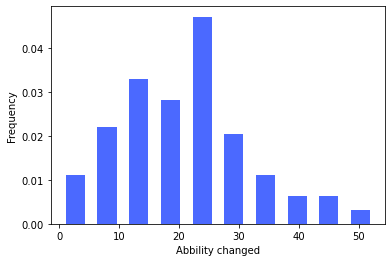

In [22]:
#don average how much hereos ability change
df_ti.Abbility_changed.hist(density=True, rwidth=0.6, color="#4b69ff", grid=False)
plt.xlabel("Abbility changed")
plt.ylabel("Frequency")

Comparison of how much heroes got stats increase vs decrease:
----

Text(0, 0.5, 'Stats increased vs Stats decreased')

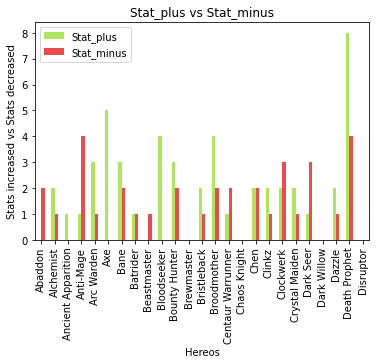

In [55]:
mycolors = ["#ade55c", "#eb4b4b"]

df_ti.iloc[0:25].plot(
    x="Name", y=["Stat_plus", "Stat_minus"], kind="bar", color = mycolors
)
plt.title("Stat_plus vs Stat_minus")
plt.xlabel("Hereos")
plt.ylabel("Stats increased vs Stats decreased")

Text(0, 0.5, 'Stats increased vs Stats decreased')

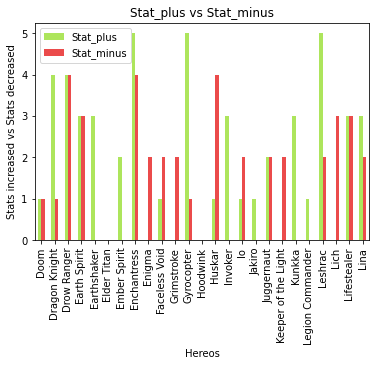

In [56]:
mycolors = ["#ade55c", "#eb4b4b"]

df_ti.iloc[25:50].plot(
    x="Name", y=["Stat_plus", "Stat_minus"], kind="bar", color = mycolors
)
plt.title("Stat_plus vs Stat_minus")
plt.xlabel("Hereos")
plt.ylabel("Stats increased vs Stats decreased")

Text(0, 0.5, 'Stats increased vs Stats decreased')

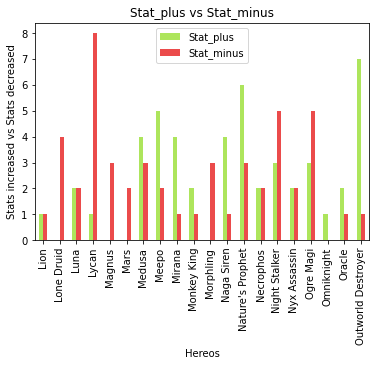

In [57]:
mycolors = ["#ade55c", "#eb4b4b"]

df_ti.iloc[50:70].plot(
    x="Name", y=["Stat_plus", "Stat_minus"], kind="bar", color = mycolors
)
plt.title("Stat_plus vs Stat_minus")
plt.xlabel("Hereos")
plt.ylabel("Stats increased vs Stats decreased")

Text(0, 0.5, 'Stats increased vs Stats decreased')

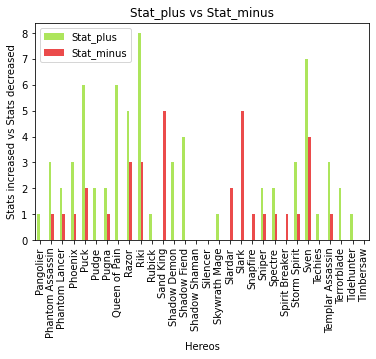

In [58]:
mycolors = ["#ade55c", "#eb4b4b"]

df_ti.iloc[70:100].plot(
    x="Name", y=["Stat_plus", "Stat_minus"], kind="bar", color = mycolors
)
plt.title("Stat_plus vs Stat_minus")
plt.xlabel("Hereos")
plt.ylabel("Stats increased vs Stats decreased")

Text(0, 0.5, 'Stats increased vs Stats decreased')

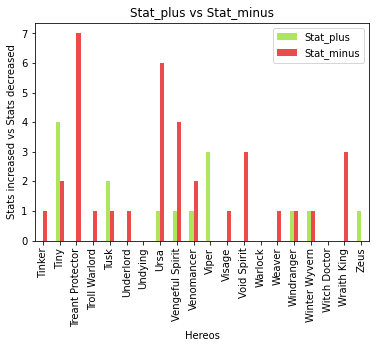

In [59]:
mycolors = ["#ade55c", "#eb4b4b"]

df_ti.iloc[100:120].plot(
    x="Name", y=["Stat_plus", "Stat_minus"], kind="bar", color = mycolors
)
plt.title("Stat_plus vs Stat_minus")
plt.xlabel("Hereos")
plt.ylabel("Stats increased vs Stats decreased")

The pie chart below shows that the destribution of primary attributes is close, and there are no attribute bias:
------

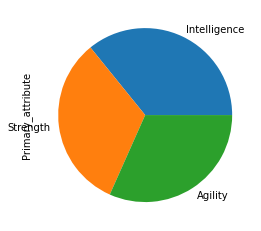

In [27]:
df_ti["Primary_attribute"].value_counts().plot(kind="pie")

Here we can see that at last matches of TI, is close to quarter of all the heroes:
-----

Text(0.5, 1.0, 'Number of heroes picked in TI')

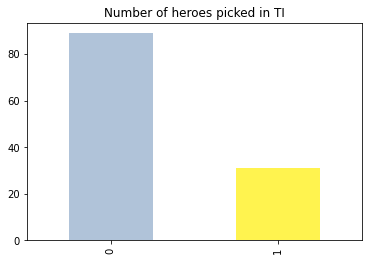

In [60]:
mycolors = ["#b0c3d9", "#fff34f"]
df_ti["In_TI"].value_counts().plot(kind="bar", color = mycolors)

plt.title("Number of heroes picked in TI")

Below we can see how heroes compared to each other where "Buffed" or "Nurfed":
-------------------------------------------------------------------

Text(0, 0.5, 'Buffed vs Nerfed')

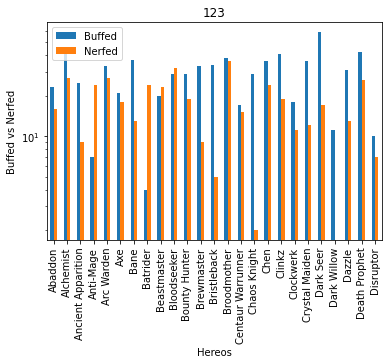

In [41]:
df_ti.iloc[0:25, :].plot(
    x="Name", y=["Buffed", "Nerfed"], kind="bar"
)
plt.yscale("log")
plt.title("123")
plt.xlabel("Hereos")
plt.ylabel("Buffed vs Nerfed")

Text(0, 0.5, 'Buffed vs Nerfed')

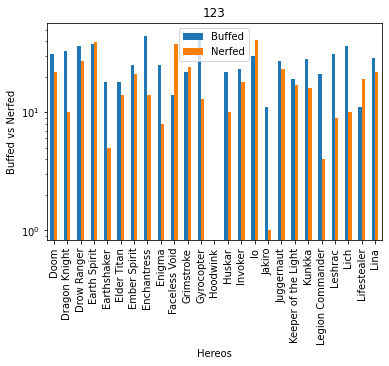

In [42]:
df_ti.iloc[25:50, :].plot(
    x="Name", y=["Buffed", "Nerfed"], kind="bar"
)
plt.yscale("log")
plt.title("123")
plt.xlabel("Hereos")
plt.ylabel("Buffed vs Nerfed")

Text(0, 0.5, 'Buffed vs Nerfed')

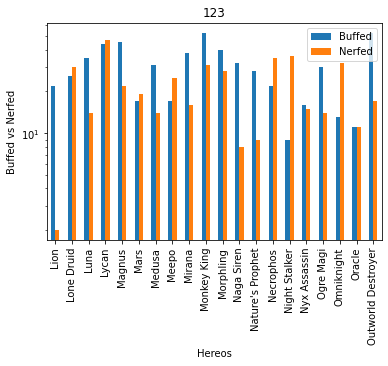

In [44]:
df_ti.iloc[50:70, :].plot(
    x="Name", y=["Buffed", "Nerfed"], kind="bar"
)
plt.yscale("log")
plt.title("123")
plt.xlabel("Hereos")
plt.ylabel("Buffed vs Nerfed")

Text(0, 0.5, 'Buffed vs Nerfed')

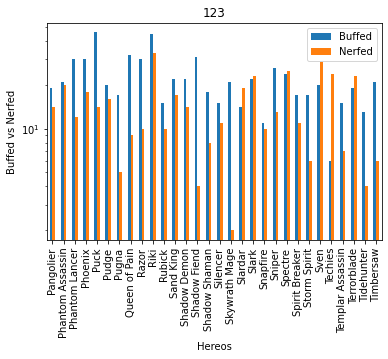

In [45]:
df_ti.iloc[70:100, :].plot(
    x="Name", y=["Buffed", "Nerfed"], kind="bar"
)
plt.yscale("log")
plt.title("123")
plt.xlabel("Hereos")
plt.ylabel("Buffed vs Nerfed")

Text(0, 0.5, 'Buffed vs Nerfed')

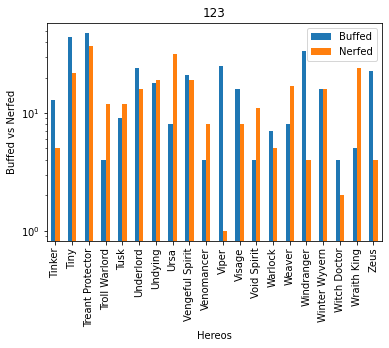

In [46]:
df_ti.iloc[100:120, :].plot(
    x="Name", y=["Buffed", "Nerfed"], kind="bar"
)
plt.yscale("log")
plt.title("123")
plt.xlabel("Hereos")
plt.ylabel("Buffed vs Nerfed")